In [179]:
import numpy as np
import matplotlib.pyplot as plt

# disable warnings
import warnings
warnings.filterwarnings('ignore')

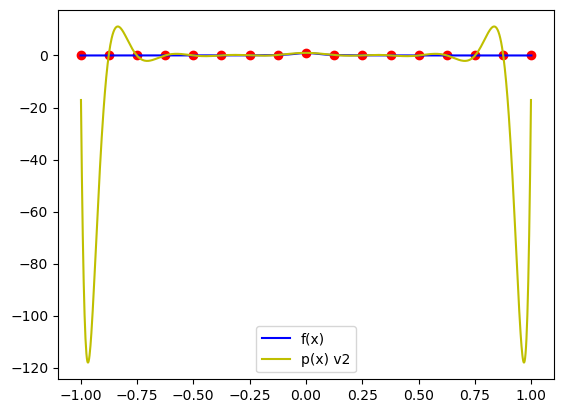

In [180]:
f = lambda x: 1/(1+(16*x)**2)

n = 16

X = np.array([-1 + ((i+1)-1)*2/n for i in range(n+1)])
Y = f(X)

# barycentric Lagrange interpolation weights
w = np.zeros(n+1)
for i in range(n+1):
    w[i] = np.prod([1/(X[i]-X[j]) for j in range(n+1) if j != i])

# barycentric Lagrange interpolation

# second version
phi = lambda x: np.prod([x-X[i] for i in range(n+1)])
def barycentric_lagrange_v2(X,Y):
    return lambda x: phi(x)*np.sum([w[i]*Y[i]/(x-X[i]) for i in range(n+1)])

p2 = barycentric_lagrange_v2(X,Y)

# plot
plt.plot(X, Y, 'ro')
X_ = np.linspace(-1, 1, 1000)
plt.plot(X_, f(X_), 'b', label='f(x)')
Y_ = [p2(x) for x in X_]
plt.plot(X_, Y_, 'y', label='p(x) v2')
plt.legend()
plt.show()

In [181]:
# error plots
e1 = np.log10([np.abs(phi(x)) for x in X_])

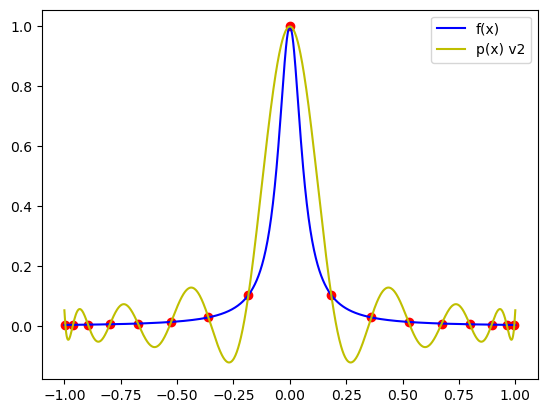

In [182]:
# using chebyshev nodes
X = np.array([np.cos((2*i+1)*np.pi/(2*(n + 1))) for i in range(n+1)])
Y = f(X)

phi = lambda x: np.prod([x-X[i] for i in range(n+1)])

w = np.zeros(n+1)
for i in range(n+1):
    w[i] = np.prod([1/(X[i]-X[j]) for j in range(n+1) if j != i])

p2 = barycentric_lagrange_v2(X,Y)

# plot
plt.plot(X, Y, 'ro')
X_ = np.linspace(-1, 1, 1000)
plt.plot(X_, f(X_), 'b', label='f(x)')
Y_ = [p2(x) for x in X_]
plt.plot(X_, Y_, 'y', label='p(x) v2')
plt.legend()
plt.show()

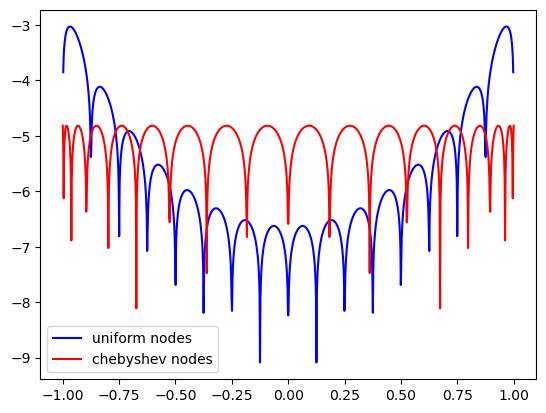

In [183]:
# error plots
e2 = np.log10([np.abs(phi(x)) for x in X_])

plt.plot(X_, e1, 'b', label='uniform nodes')
plt.plot(X_, e2, 'r', label='chebyshev nodes')
plt.legend()
plt.show()

### Q3

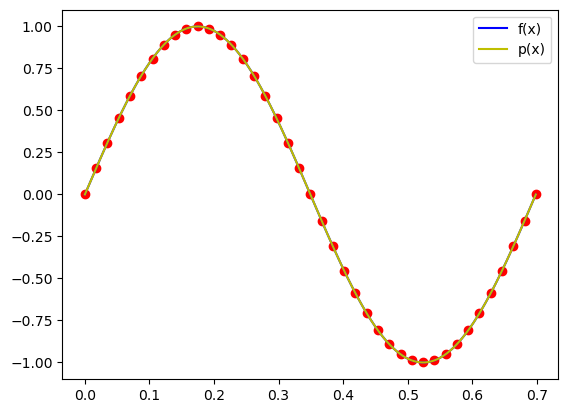

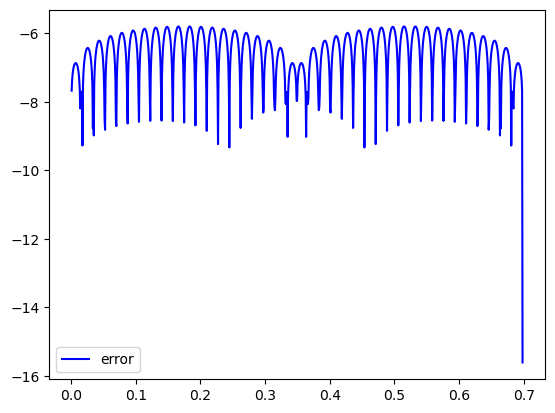

In [218]:
# use scipy for periodic cubic spline interpolation in [0,1]
f = lambda x: np.sin(9*x)

n = 40

X = np.linspace(0, (2/9)*np.pi, n+1)
# X = np.append(X, 2*np.pi)
Y = f(X)
Y[-1] = Y[0]

from scipy.interpolate import CubicSpline

cs = CubicSpline(X, Y, bc_type='periodic')

# plot
plt.plot(X, Y, 'ro')
X_ = np.linspace(0, (2/9)*np.pi, 1000)
plt.plot(X_, f(X_), 'b', label='f(x)')
Y_ = cs(X_)
plt.plot(X_, Y_, 'y', label='p(x)')
plt.legend()
plt.show()

# plot interpolation error

# error plots
e1 = np.log10([np.abs(f(x) - cs(x)) for x in X_])

plt.plot(X_, e1, 'b', label='error')
plt.legend()
plt.show()

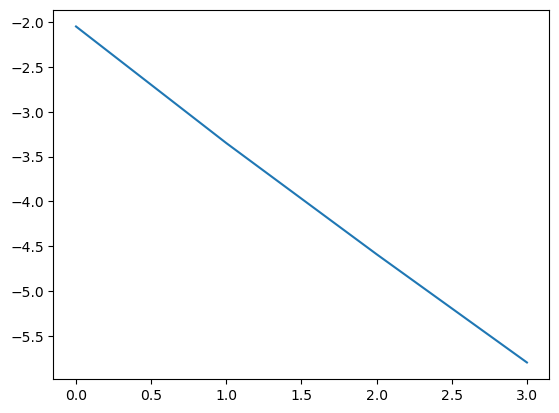

In [219]:
# run the same, but for n=5,10,20,40 plotting the log of the interpolation error

n = [5, 10, 20, 40]
errors = []
for i in n:
    X = np.linspace(0, (2/9)*np.pi, i+1)
    Y = f(X)
    Y[-1] = Y[0]
    cs = CubicSpline(X, Y, bc_type='periodic')
    errors.append(np.log10(np.abs(f(X_)-cs(X_)).max()))

# plot
plt.plot(errors)

# data

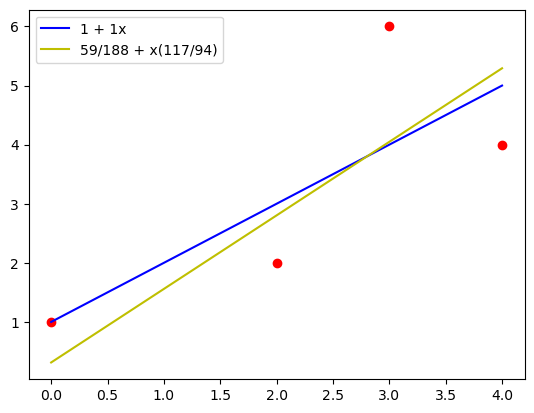

In [220]:
X = (0,4,2,3)
Y = (1,4,2,6)

# plot data
plt.plot(X, Y, 'ro')

# plot line 1 + 1x
X_ = np.linspace(0, 4, 5)
Y_ = 1 + X_
plt.plot(X_, Y_, 'b', label='1 + 1x')

# plot line 59/188 + x(117/94)
Y_ = (59/188) + (117/94)*X_
plt.plot(X_, Y_, 'y', label='59/188 + x(117/94)')
plt.legend()
plt.show()
